In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import pingouin as pg
from tqdm.notebook import tqdm
from analysis_module import *
from analysis_fixation import *
# help(Fixation.parse_trials)

In [122]:
import analysis_fixation
from importlib import reload
reload(analysis_fixation)
from analysis_fixation import *

In [363]:
fix_analyse = Fixation('s4', show = False)
trial_x, trial_y, rms, std = fix_analyse.parse_trials(pred_path.ETH,pred_final=True , col_x="pred_x", col_y="pred_y", show = False) #use df_path="calib_test1/SP_outputs" for SP preds
get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)/54.04

2.44490087762139

In [362]:
579.885927586444/54.05

10.728694312422647

In [9]:
model=pred_path.ETH
paths = glob.glob(model.value+'s*/calib_test1/outputs') #all subjects where calib models are available : 64 - 1 (s46) = 63 total
subjects = [p.split("/")[-3] for p in paths]
len(subjects)

65

## Calib Test 1 (Sample Size)

In [45]:
# labels = ["Beg", "Beg+Mid", "Beg+Mid+End"]
# ct1 = pd.DataFrame(columns = ["subject","factor","acc"])
# for subb in tqdm(subjects): 
#     fix_analyse = Fixation(subb, show = False)
#     for factor in [1,2,3]:
#         trial_x, trial_y, *_ = fix_analyse.parse_trials(model, col_x=f"poly_x_{factor}", col_y=f"poly_y_{factor}", calib_test=1, show = False)
#         acc = get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)
#         ct1 = ct1.append({"subject":subb, "factor": labels[factor-1], "acc":acc}, ignore_index = True)
# ct1.to_csv(f"calib_tests_df/{model.name.lower()}_ct1.csv", index = False)

#rename to _SP and update analyse_fixation

 35%|███████████████▏                           | 23/65 [09:23<15:28, 22.10s/it]

no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12


100%|███████████████████████████████████████████| 65/65 [25:27<00:00, 23.50s/it]


In [211]:
## Loaf dfs
ct1_mpii = pd.read_csv("calib_tests_df/mpii_ct1_SP.csv")
ct1_eth = pd.read_csv("calib_tests_df/eth_ct1_SP.csv")
ct1_faze = pd.read_csv("calib_tests_df/faze_ct1_SP.csv")

# ct1_mpii = ct1_mpii[ct1_mpii["subject"].isin(subjects)].reset_index(drop=True)
# ct1_eth = ct1_eth[ct1_eth["subject"].isin(subjects)].reset_index(drop=True)
# ct1_faze = ct1_faze[ct1_faze["subject"].isin(subjects)].reset_index(drop=True)

In [333]:
#Interestingly worst performing subjects are different for each model 
pd.concat([d.sort_values('acc',ascending = True).head(10).reset_index(drop=True) for d in [ct1_mpii, ct1_eth, ct1_faze]], axis=1, keys=["MPII","ETH","FAZE"])

MPII                              ETH                             FAZE  \
  subject       factor         acc subject       factor         acc subject   
0     s80  Beg+Mid+End   97.864167    s111  Beg+Mid+End  106.236695      s1   
1     s80      Beg+Mid   98.731716    s111      Beg+Mid  111.778236      s1   
2     s80          Beg  105.763413     s68      Beg+Mid  122.049737     s60   
3     s39      Beg+Mid  112.466719      s8  Beg+Mid+End  127.507387     s18   
4     s39  Beg+Mid+End  112.826105     s34  Beg+Mid+End  128.129921    s111   
5     s44  Beg+Mid+End  114.720326     s56  Beg+Mid+End  130.884708     s32   
6     s61      Beg+Mid  116.482172     s56      Beg+Mid  132.148436     s71   
7     s39          Beg  116.643035     s75  Beg+Mid+End  133.562460      s4   
8     s60          Beg  117.132427     s34      Beg+Mid  136.799697      s4   
9    s115          Beg  120.357662     s20  Beg+Mid+End  138.035327    s103   

                           
        factor        acc  
0      Beg+Mid  66.827051  
1  Beg+Mid+End  70.761885  
2  Beg+Mid+End  74.620238  
3  Beg+Mid+End  81.219422  
4  Beg+Mid+End  81.348663  
5  Beg+Mid+End  81.827611  
6          Beg  82.852600  
7  Beg+Mid+End  85.126747  
8          Beg  86.275713  
9  Beg+Mid+End  86.333273

In [336]:
# import cv2
# for sub in ["s80s39", "s4,"s60"4"","]:
#     vid = cv2.VideoCapture(glob.glob(f"Subjects/{sub}/??????/*")[5])
#     re,frame=vid.read()
#     plt.figure(figsize=(16,9))
#     plt.imshow(frame[:,:,::-1])
#     plt.show()

<AxesSubplot:xlabel='subject'>

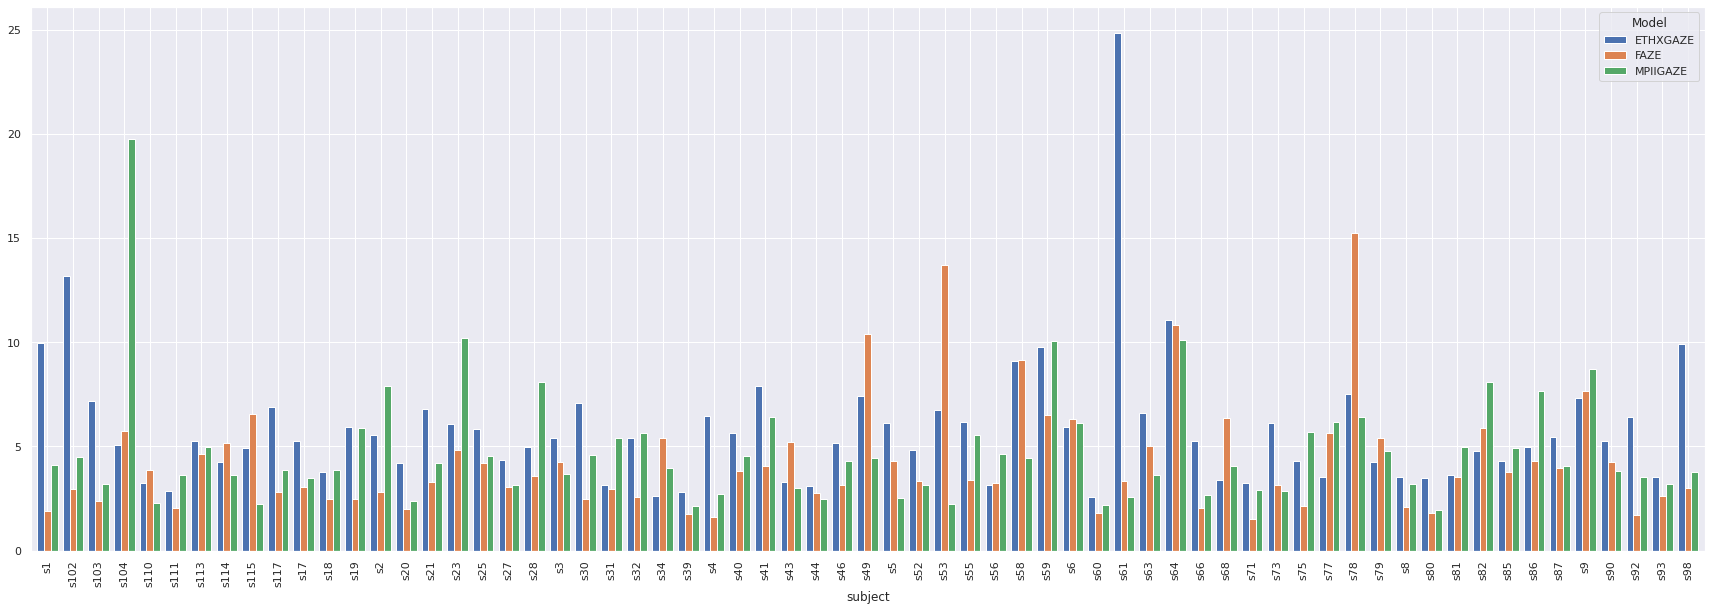

In [331]:
temp = pd.concat([ct1_mpii, ct1_eth, ct1_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp["acc"]/54.05
temp[temp["factor"] == "Beg"].pivot(index="subject", columns="Model", values="acc_deg").plot(kind="bar", figsize=(30,10), width=0.8)

In [109]:
def ct1_run_tests(ct1_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct1_df = ct1_df.copy()
    if in_vis_deg: 
        ct1_df["acc_deg"] = ct1_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
    if exclude_low_fps: #test parameter
        ct1_df = ct1_df[~ct1_df.subject.isin(low_fps_subb)]
    
    print(ct1_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']))
    print(AnovaRM(data=ct1_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct1_df, color=pal[2], showfliers = False)
    sns.swarmplot(x="factor", y=target, data = ct1_df, color = pal[0])
    plt.show()

             count        max      mean       min       std
factor                                                     
Beg             65  20.920962  4.965501  2.080064  3.097902
Beg+Mid         65  11.306958  4.258988  1.836741  1.847173
Beg+Mid+End     65  11.208970  4.159439  1.778638  1.834301
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor 11.0505 2.0000 128.0000 0.0000



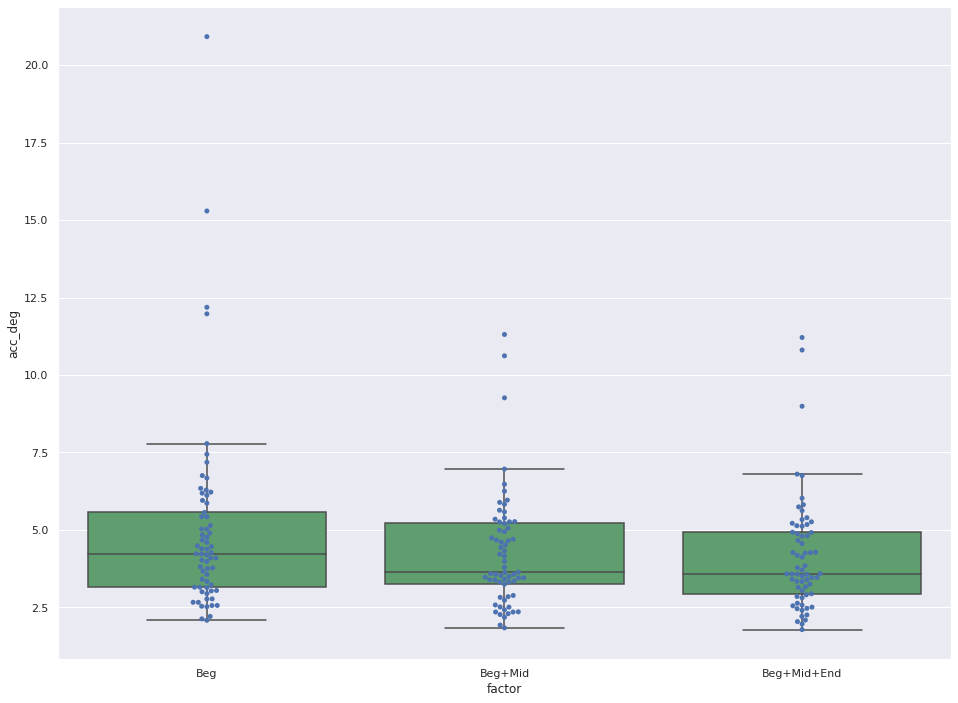

             count        max      mean       min       std
factor                                                     
Beg             65  11.839176  5.150002  2.391370  2.016594
Beg+Mid         65  10.517409  4.478762  1.932068  1.791512
Beg+Mid+End     65  10.115671  4.363603  2.067101  1.742078
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor 15.0305 2.0000 128.0000 0.0000



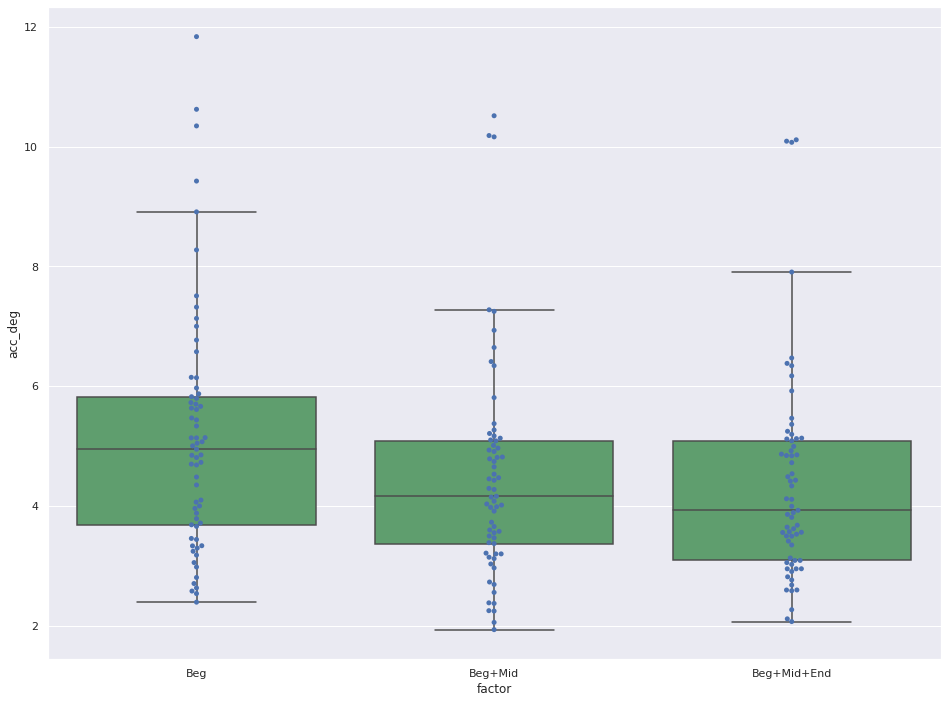

             count        max      mean       min       std
factor                                                     
Beg             65  11.801209  3.771809  1.273206  1.801922
Beg+Mid         65  11.246206  2.992425  1.283358  1.417379
Beg+Mid+End     65  11.029067  2.821400  1.398690  1.389888
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor 52.9839 2.0000 128.0000 0.0000



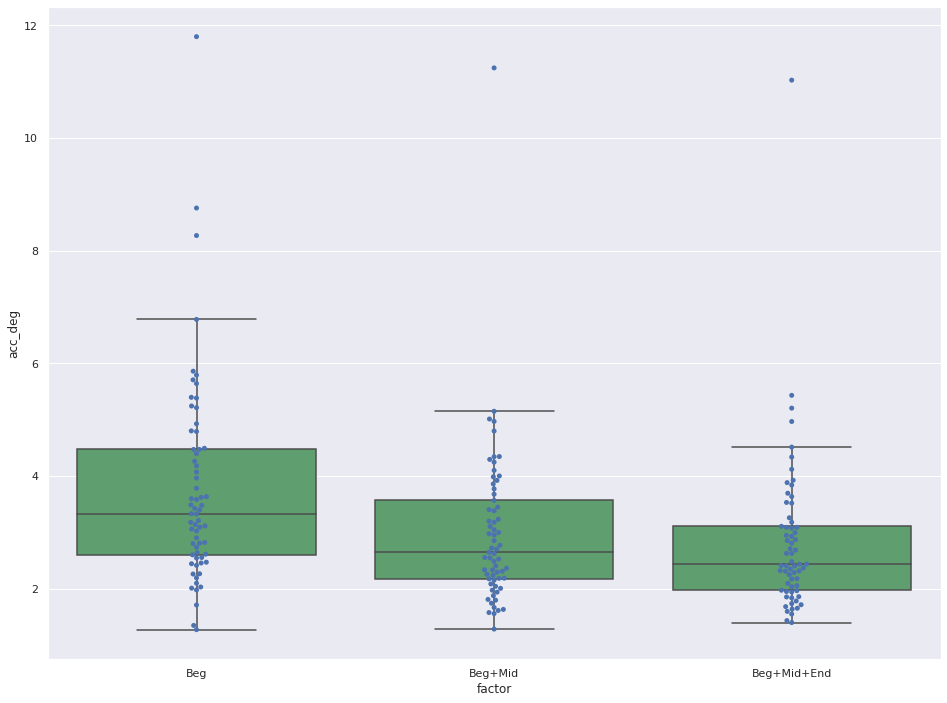

In [52]:
#ALL SUBJECTS
ct1_run_tests(ct1_mpii, in_vis_deg=True)
ct1_run_tests(ct1_eth, in_vis_deg=True)
ct1_run_tests(ct1_faze, in_vis_deg=True)

(0.0, 10.0)

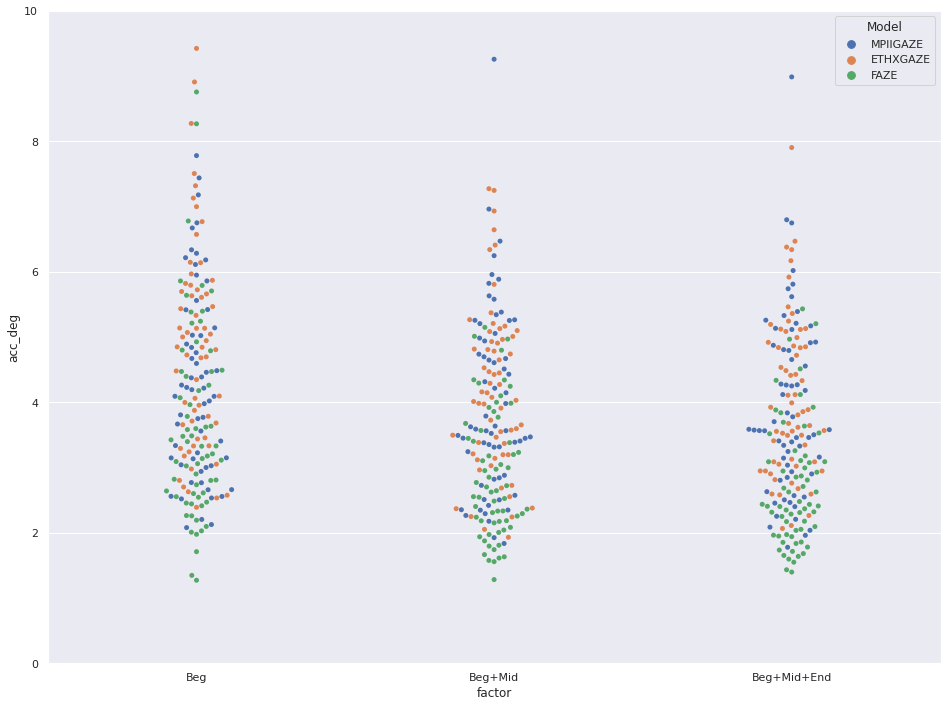

In [92]:
sns.swarmplot(x="factor", y="acc_deg", hue="Model", data = temp)
plt.ylim([0,10])

Text(0, 0.5, '')

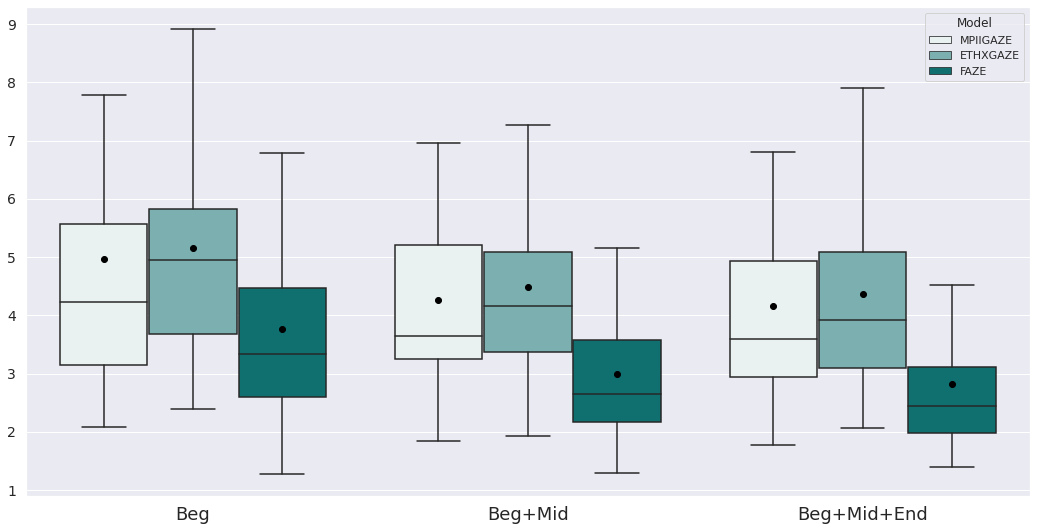

In [210]:
#Complete 65 subjects E_calib
plt.figure(figsize=(18,9))
temp = pd.concat([ct1_mpii, ct1_eth, ct1_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False,  showmeans=True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
sns.swarmplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal")
# plt.ylim([0,10])

Text(0, 0.5, '')

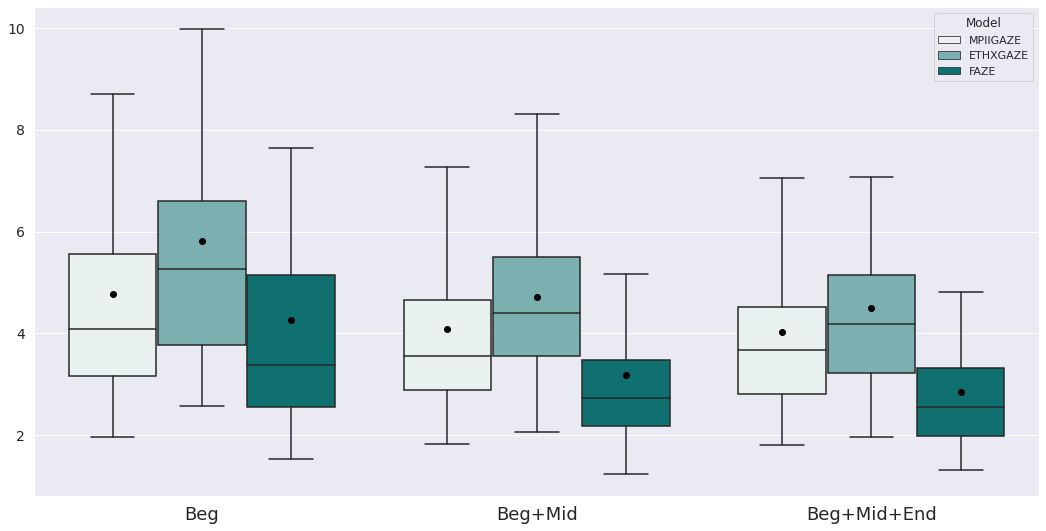

In [213]:
#Complete 65 subjects SP_calib
plt.figure(figsize=(18,9))
temp = pd.concat([ct1_mpii, ct1_eth, ct1_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False,  showmeans=True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
# sns.swarmplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal")
# plt.ylim([0,10])

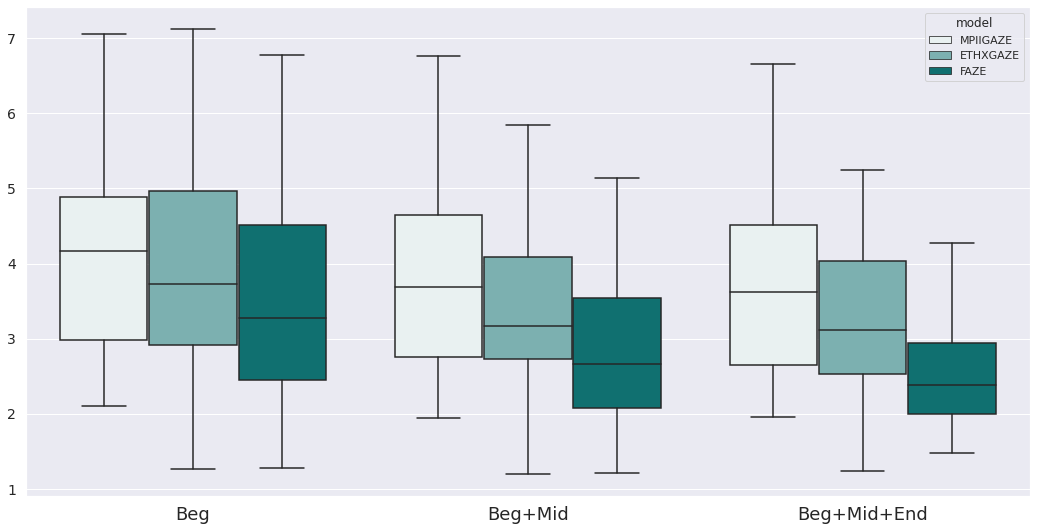

In [90]:
##ETRA 41 Subjects
plt.figure(figsize=(18,9))
temp = pd.concat([ct1_mpii, ct1_eth, ct1_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
# plt.savefig("calib1_etra.svg")
# sns.swarmplot(x="factor", y="acc_deg", hue="model", data = temp, color = pal[0])
# plt.ylim([0,10])

In [102]:
# ct1_comb all data for 2 Factor anova
ct1_comb = pd.merge(ct1_mpii,ct1_eth, on = ["subject", "factor"]).merge(ct1_faze, on = ["subject", "factor"])
ct1_comb = ct1_comb.set_index(["subject","factor"]).stack().reset_index()
ct1_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct1_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
print(AnovaRM(data=ct1_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample              54.4775 2.0000 128.0000 0.0000
factor_model               29.0107 2.0000 128.0000 0.0000
factor_sample:factor_model  0.1821 4.0000 256.0000 0.9475



In [103]:
from pingouin import rm_anova #Same test diff library
rm_anova(data=ct1_comb, dv = 'acc', within = ['factor_sample', 'factor_model'], subject='subject', detailed = True, effsize = 'n2')

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/pingouin/distribution.py:485: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,factor_sample,237748.300715,2,128,118874.150358,54.477473,7.635340e-18,1.685463e-11,0.070171,0.588680
1,factor_model,721935.550580,2,128,360967.775290,29.010743,4.068170e-11,6.352330e-10,0.213077,0.864851
2,factor_sample * factor_model,1579.152882,4,256,394.788221,0.182124,9.475408e-01,7.451249e-01,0.000466,0.337776


In [98]:
mpii = ct1_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct1_eth[["subject","acc"]].groupby("subject").mean()
faze = ct1_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  8.10522  |    64 | two-sided     | 2.10335e-11 | 6.31006e-11 | bonf       | 4.402e+08 |  0.914203 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  0.822892 |    64 | two-sided     | 0.413625    | 1           | bonf       | 0.188     |  0.103311 |
|  2 | model      | FAZE     | MPII | True     | True         | -6.54156  |    64 | two-sided     | 1.17737e-08 | 3.53212e-08 | bonf       | 1.036e+06 | -0.678305 |


In [99]:
avg_samples = ct1_mpii.append(ct1_eth).append(ct1_faze)

avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()

print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | Contrast   | A       | B           | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:--------|:------------|:---------|:-------------|--------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | factor     | Beg     | Beg+Mid     | True     | True         | 7.08317 |    64 | two-sided     | 1.32927e-09 | 3.9878e-09  | bonf       |  8.286e+06 | 0.434789  |
|  1 | factor     | Beg     | Beg+Mid+End | True     | True         | 7.94244 |    64 | two-sided     | 4.07223e-11 | 1.22167e-10 | bonf       |  2.334e+08 | 0.516114  |
|  2 | factor     | Beg+Mid | Beg+Mid+End | True     | True         | 3.58288 |    64 | two-sided     | 0.000656056 | 0.00196817  | bonf       | 38.14      | 0.0883443 |


In [100]:
import pingouin as pg
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_mpii).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_eth).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_faze).to_markdown())

|    | Contrast   | A       | B           | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |     p-corr | p-adjust   |   BF10 |    hedges |
|---:|:-----------|:--------|:------------|:---------|:-------------|--------:|------:|:--------------|------------:|-----------:|:-----------|-------:|----------:|
|  0 | factor     | Beg     | Beg+Mid     | True     | True         | 3.10544 |    64 | two-sided     | 0.00283036  | 0.00849109 | bonf       | 10.279 | 0.275394  |
|  1 | factor     | Beg     | Beg+Mid+End | True     | True         | 3.54051 |    64 | two-sided     | 0.000750513 | 0.00225154 | bonf       | 33.772 | 0.314772  |
|  2 | factor     | Beg+Mid | Beg+Mid+End | True     | True         | 2.79197 |    64 | two-sided     | 0.0068992   | 0.0206976  | bonf       |  4.69  | 0.0537636 |
|    | Contrast   | A       | B           | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |    hedges |
|---:|:-

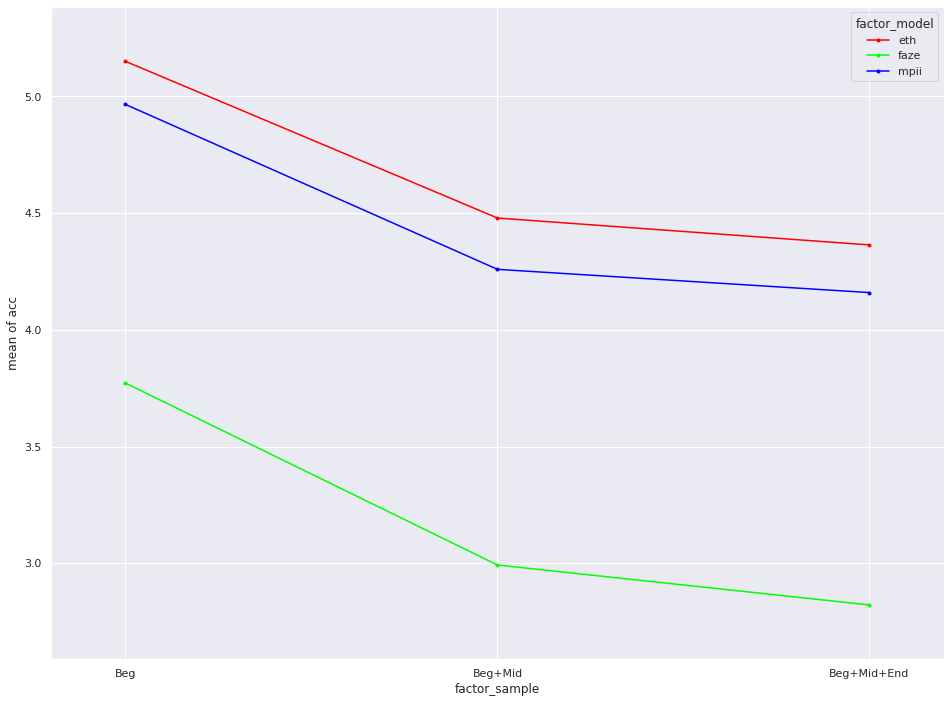

In [104]:
from statsmodels.graphics.factorplots import interaction_plot
# ct1_comb["acc_v"] = ct1_comb['acc']/54.05
interaction_plot(ct1_comb["factor_sample"], ct1_comb["factor_model"], ct1_comb["acc"]/54.05)
plt.show()

## Calib Test 2 (Collection time)

In [46]:
##Create Dataframes

## for Beg+Mid+End vs Blockwise
# model=pred_path.MPII
# labels = ["Beg+Mid+End", "BlockWise"] #Beg, Mid, End
# ct2 = pd.DataFrame(columns = ["subject","factor","acc"])
# for subb in tqdm(subjects): 
#     fix_analyse = Fixation(subb, show = False)
#     for test,col in zip([1,2], [("poly_x_3", "poly_y_3"), ("poly_x","poly_y")]): #UPDATE from best results of calib_test1
#         trial_x, trial_y, *_ = fix_analyse.parse_trials(model, col[0], col[1], calib_test=test, show = False)
#         acc = get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)
#         ct2 = ct2.append({"subject":subb, "factor": labels[test-1], "acc":acc}, ignore_index = True)
# ct2.to_csv(f"calib_tests_df/{model.name.lower()}_ct2.csv", index = False)

## for Blockwise vs single calib blocks
# model=pred_path.MPII
# labels = ["Beg", "Mid", "End", "BlockWise"] #Beg, Mid, End
# ct2 = pd.DataFrame(columns = ["subject","factor","acc"])
# for subb in tqdm(subjects): 
#     fix_analyse = Fixation(subb, show = False)
#     for factor,col in zip(labels, [("poly_x_beg", "poly_y_beg"), ("poly_x_mid", "poly_y_mid"), ("poly_x_end", "poly_y_end"), ("poly_x","poly_y")]):
#         df_path = None if factor=="BlockWise" else "calib_test2/single_block_outputs"
#         trial_x, trial_y, *_ = fix_analyse.parse_trials(model, col_x=col[0], col_y=col[1], calib_test=2, show = False, df_path=df_path)
#         acc = get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)
#         ct2 = ct2.append({"subject":subb, "factor": factor, "acc":acc}, ignore_index = True)
# ct2.to_csv(f"calib_tests_df/{model.name.lower()}_ct2_single_blocks.csv", index = False)

 35%|███████████████▏                           | 23/65 [06:19<10:28, 14.96s/it]

no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12


 35%|███████████████▏                           | 23/65 [06:19<10:24, 14.87s/it]

no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12


 35%|███████████████▏                           | 23/65 [06:14<10:14, 14.64s/it]

no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12


100%|███████████████████████████████████████████| 65/65 [16:51<00:00, 15.56s/it]


In [215]:
## Load Dfs
ct2_mpii = pd.read_csv("calib_tests_df/mpii_ct2.csv")
ct2_eth = pd.read_csv("calib_tests_df/eth_ct2.csv")
ct2_faze = pd.read_csv("calib_tests_df/faze_ct2.csv")

# ct2_mpii = ct2_mpii[ct2_mpii["subject"].isin(subjects)].reset_index(drop=True)
# ct2_eth = ct2_eth[ct2_eth["subject"].isin(subjects)].reset_index(drop=True)
# ct2_faze = ct2_faze[ct2_faze["subject"].isin(subjects)].reset_index(drop=True)

## Single Calib Block Analysis

In [130]:
#Significant effect of model and sample (no interaction)
ct2_comb = pd.merge(ct2_mpii,ct2_eth, on = ["subject", "factor"]).merge(ct2_faze, on = ["subject", "factor"])
ct2_comb = ct2_comb.set_index(["subject","factor"]).stack().reset_index()
ct2_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct2_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
print(AnovaRM(data=ct2_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample               6.2669 3.0000 192.0000 0.0004
factor_model               12.4389 2.0000 128.0000 0.0000
factor_sample:factor_model  1.5397 6.0000 384.0000 0.1639



In [164]:
# Model Effect
mpii = ct2_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct2_eth[["subject","acc"]].groupby("subject").mean()
faze = ct2_faze[["subject","acc"]].groupby("subject").mean()

avg_models = pd.concat([mpii,eth,faze], keys=["MPII","ETHXGaze", "FAZE"], names=["model"]).reset_index()
avg_models["acc_deg"] = avg_models["acc"]/54.05
print(avg_models.groupby("model").mean().sort_values("acc").reset_index().to_markdown(), end="\n\n")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | model    |     acc |   acc_deg |
|---:|:---------|--------:|----------:|
|  0 | FAZE     | 211.891 |   3.92029 |
|  1 | MPII     | 262.774 |   4.86169 |
|  2 | ETHXGaze | 284.723 |   5.26776 |

|    | Contrast   | A        | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |     BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|---------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  5.27614 |    64 | two-sided     | 1.67272e-06 | 5.01815e-06 | bonf       | 9546.19  |  0.655771 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  1.39878 |    64 | two-sided     | 0.166707    | 0.50012     | bonf       |    0.344 |  0.190523 |
|  2 | model      | FAZE     | MPII | True     | True         | -3.30834 |    64 | two-sided     | 0.00154321  | 0.00462963  | bonf       |   17.65

Text(0, 0.5, '')

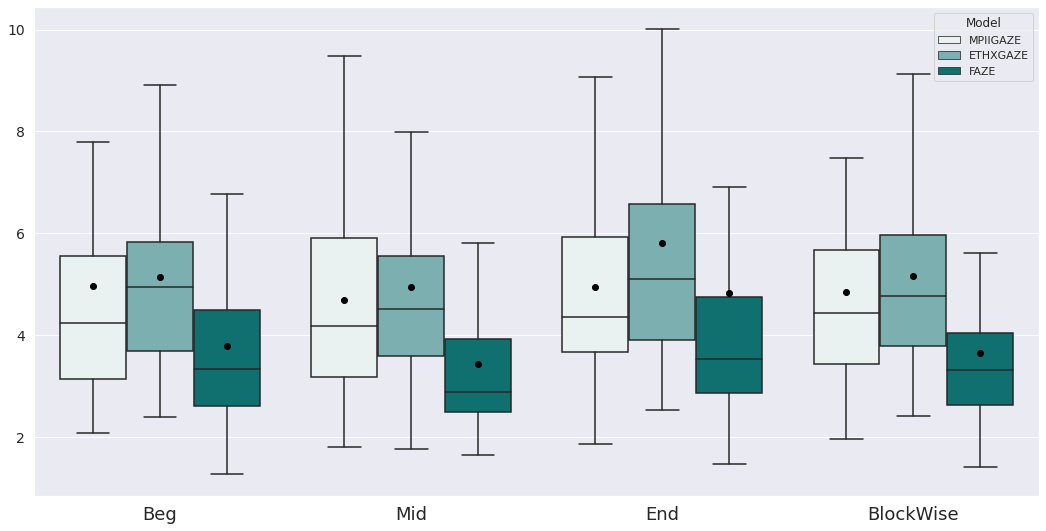

In [204]:
plt.figure(figsize=(18,9))
temp = pd.concat([ct2_mpii, ct2_eth, ct2_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')

In [191]:
print("MPII"); print(ct2_mpii.groupby("factor").mean().sort_values("acc").to_markdown())
print("\nETHXGaze"); print(ct2_eth.groupby("factor").mean().sort_values("acc").to_markdown())
print("\nFAZE"); print(ct2_faze.groupby("factor").mean().sort_values("acc").to_markdown())

MPII
| factor    |     acc |
|:----------|--------:|
| Mid       | 253.451 |
| BlockWise | 262.267 |
| End       | 266.994 |
| Beg       | 268.385 |

ETHXGaze
| factor    |     acc |
|:----------|--------:|
| Mid       | 267.422 |
| Beg       | 278.358 |
| BlockWise | 279.414 |
| End       | 313.697 |

FAZE
| factor    |     acc |
|:----------|--------:|
| Mid       | 185.267 |
| BlockWise | 196.753 |
| Beg       | 204.232 |
| End       | 261.314 |


In [200]:
avg_samples = pd.concat([ct2_mpii,ct2_eth,ct2_faze])
avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index() #mean over models
avg_samples["acc_deg"] = avg_samples["acc"]/54.05
print(avg_samples.groupby("factor").mean().sort_values("acc").reset_index().to_markdown(), end="\n\n")
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | factor    |     acc |   acc_deg |
|---:|:----------|--------:|----------:|
|  0 | Mid       | 235.38  |   4.35486 |
|  1 | BlockWise | 246.145 |   4.55402 |
|  2 | Beg       | 250.325 |   4.63136 |
|  3 | End       | 280.669 |   5.19276 |

|    | Contrast   | A         | B         | Paired   | Parametric   |        T |   dof | alternative   |      p-unc |    p-corr | p-adjust   |   BF10 |     hedges |
|---:|:-----------|:----------|:----------|:---------|:-------------|---------:|------:|:--------------|-----------:|----------:|:-----------|-------:|-----------:|
|  0 | factor     | Beg       | BlockWise | True     | True         |  1.00768 |    64 | two-sided     | 0.317405   | 1         | bonf       |  0.221 |  0.0442299 |
|  1 | factor     | Beg       | End       | True     | True         | -2.0228  |    64 | two-sided     | 0.0472759  | 0.283655  | bonf       |  0.916 | -0.2424    |
|  2 | factor     | Beg       | Mid       | True     | True         |  2.04675 |    64 | two-

## Blockwise vs Big+Mid+End

Text(0, 0.5, '')

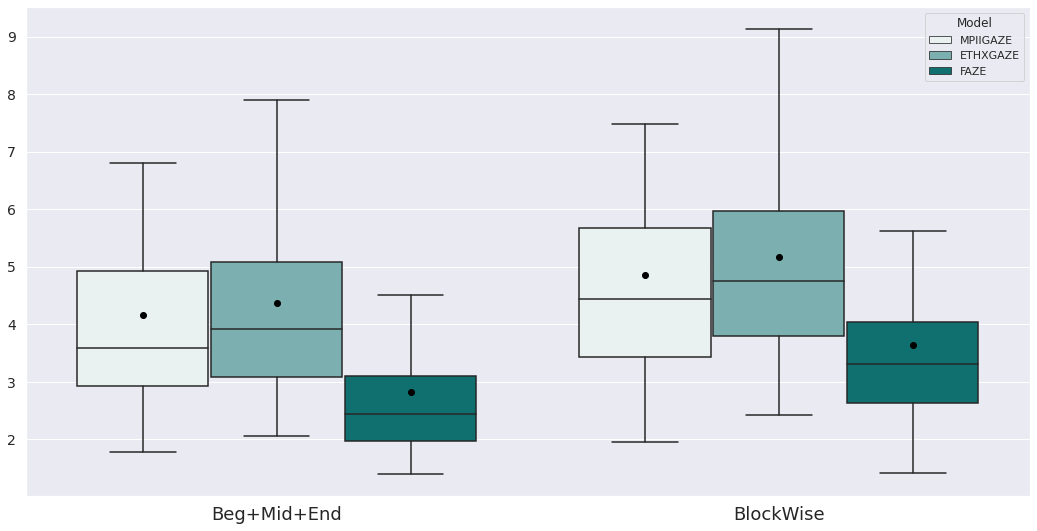

In [216]:
## Complete 65 subjects
plt.figure(figsize=(18,9))
temp = pd.concat([ct2_mpii, ct2_eth, ct2_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False,  showmeans=True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')

Text(0, 0.5, '')

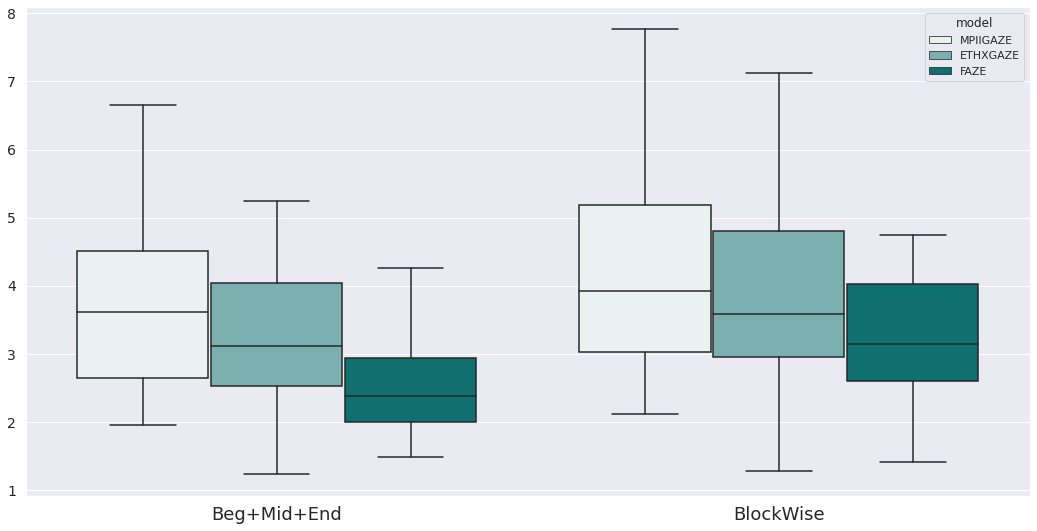

In [ ]:
## ETRA 41 Subjects
plt.figure(figsize=(18,9))
temp = pd.concat([ct2_mpii, ct2_eth, ct2_faze], keys=["MPIIGAZE", "ETHXGAZE", "FAZE"], names=["Model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="Model", data = temp, color="teal", showfliers = False)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
# plt.savefig("calib2_etra.png")

In [153]:
ct2_comb = pd.merge(ct2_mpii,ct2_eth, on = ["subject", "factor"]).merge(ct2_faze, on = ["subject", "factor"])
ct2_comb = ct2_comb.set_index(["subject","factor"]).stack().reset_index()
# ct2_comb.columns = ["subject","factor_sample","factor_model","acc"]
# ct2_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
ct2_comb

,subject,factor,level_2,0
0,s27,Beg+Mid+End,Unnamed: 0_x,2.000000
1,s27,Beg+Mid+End,acc_x,198.640093
2,s27,Beg+Mid+End,Unnamed: 0_y,2.000000
3,s27,Beg+Mid+End,acc_y,150.750461
4,s27,Beg+Mid+End,Unnamed: 0,2.000000
...,...,...,...,...
487,s43,BlockWise,acc_x,223.546857
488,s43,BlockWise,Unnamed: 0_y,125.000000
489,s43,BlockWise,acc_y,2550.462778
490,s43,BlockWise,Unnamed: 0,125.000000


In [140]:
mpii = ct2_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct2_eth[["subject","acc"]].groupby("subject").mean()
faze = ct2_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  1.83339 |    40 | two-sided     | 0.0741942   | 0.222583    | bonf       |      0.774 |  0.371867 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  0.8932  |    40 | two-sided     | 0.377093    | 1           | bonf       |      0.245 |  0.180845 |
|  2 | model      | FAZE     | MPII | True     | True         | -6.5497  |    40 | two-sided     | 7.98607e-08 | 2.39582e-07 | bonf       | 180900     | -0.570021 |


In [141]:
avg_samples = ct2_mpii.append(ct2_eth).append(ct2_faze)

avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()

print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      BF10 |    hedges |
|---:|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|----------:|----------:|
|  0 | factor     | Beg+Mid+End | BlockWise | True     | True         | -7.58578 |    40 | two-sided     | 2.90441e-09 | 4.134e+06 | -0.228881 |


In [59]:
def ct2_run_tests(ct2_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct2_df = ct2_df.copy()
    if in_vis_deg: 
        ct2_df["acc_deg"] = ct2_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
    if exclude_low_fps:
        ct2_df = ct2_df[~ct2_df.subject.isin(low_fps_subb)]
    
    print(ct2_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']) , f"\n {'-'*122}")
#     print(AnovaRM(data=ct2_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct2_df).to_markdown(index=False), "\n")
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct2_df, color=pal[2], showfliers = False)
    sns.swarmplot(x="factor", y=target, data = ct2_df[~ct2_df.subject.isin(low_fps_subb)], color = pal[0])
    if not exclude_low_fps: sns.swarmplot(x="factor", y=target, data = ct2_df[ct2_df.subject.isin(low_fps_subb)], color = pal[1], marker = '<')
    plt.show()

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  11.230361  4.303127  1.964759  1.855452
BlockWise       63  11.916394  4.867525  2.117472  2.024429 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |     BF10 |   hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|---------:|---------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -7.02725 |    61 | two-sided     | 2.08041e-09 | 5.44e+06 | -0.28495 | 



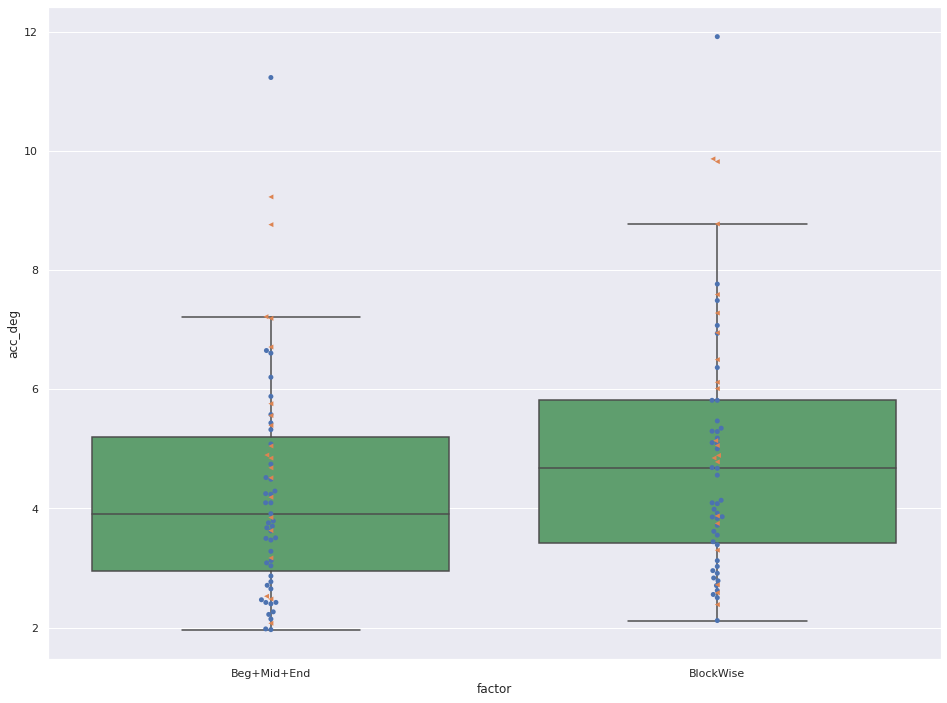

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  42.261586  4.988422  1.238458  5.949823
BlockWise       63  47.187100  6.470453  1.276047  9.044006 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |    p-unc |   BF10 |    hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|---------:|-------:|----------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -2.24265 |    61 | two-sided     | 0.028564 |  1.417 | -0.230794 | 



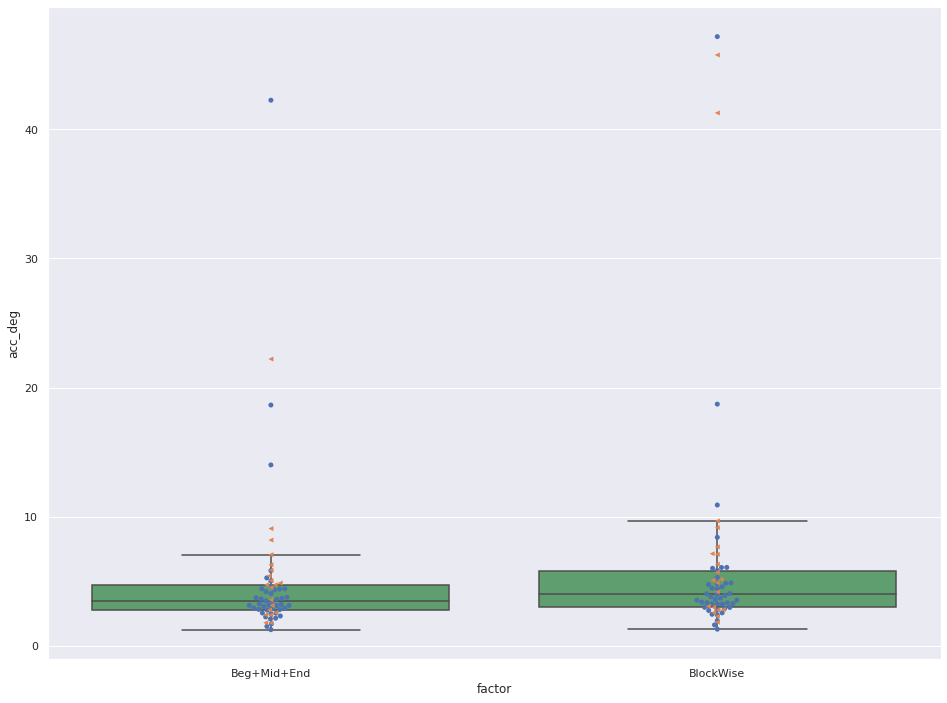

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  10.944507  3.502300  1.484853  2.047669
BlockWise       63  12.345385  4.418525  1.413773  2.451935 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      BF10 |    hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|----------:|----------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -8.40294 |    61 | two-sided     | 8.93828e-12 | 1.006e+09 | -0.403347 | 



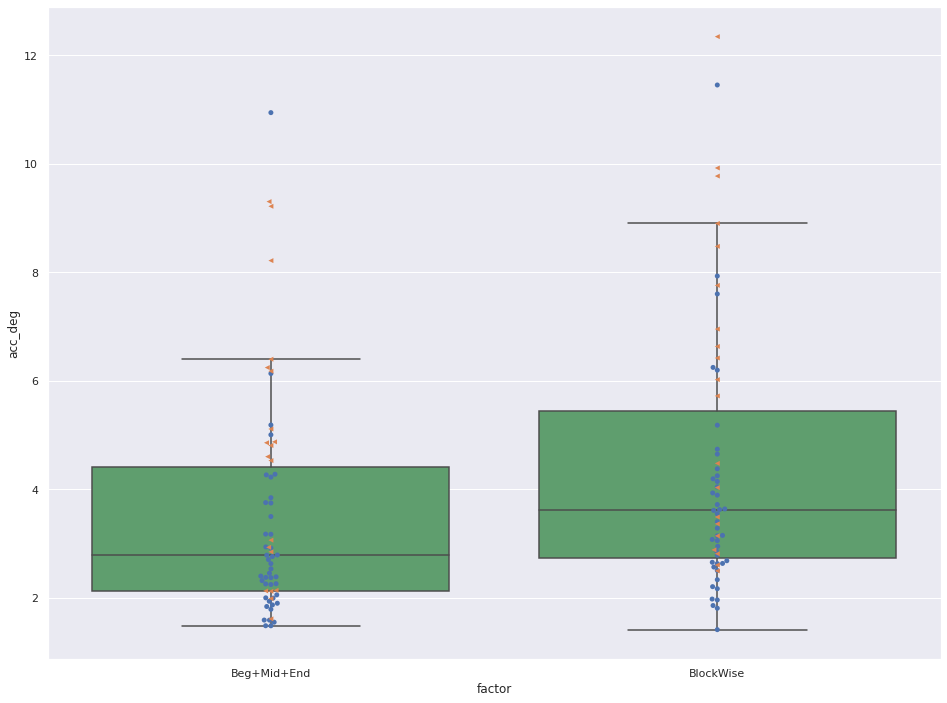

In [37]:
ct2_run_tests(ct2_mpii, in_vis_deg=True)
ct2_run_tests(ct2_eth, in_vis_deg=True)
ct2_run_tests(ct2_faze, in_vis_deg=True)

In [217]:
ct2_comb = pd.merge(ct2_mpii,ct2_eth, on = ["subject", "factor"]).merge(ct2_faze, on = ["subject", "factor"])
ct2_comb = ct2_comb.set_index(["subject","factor"]).stack().reset_index()
ct2_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct2_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
print(AnovaRM(data=ct2_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value  Num DF  Den DF  Pr > F
----------------------------------------------------------
factor_sample              106.8627 1.0000  64.0000 0.0000
factor_model                31.0622 2.0000 128.0000 0.0000
factor_sample:factor_model   0.3645 2.0000 128.0000 0.6953



## Calib Test 3

In [205]:
model=pred_path.MPII
labels=["E","SP","E+SP"]
ct3 = pd.DataFrame(columns = ["subject","factor","acc"])
for subb in tqdm(subjects): 
    fix_analyse = Fixation(subb, show = False)
    for factor in [1,2,3]: 
        trial_x, trial_y, *_ = fix_analyse.parse_trials(model, f"poly_x_{factor}", f"poly_y_{factor}", calib_test=3, show = False)
        acc = get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)
        ct3 = ct3.append({"subject":subb, "factor": labels[factor-1], "acc":acc}, ignore_index = True)
ct3.to_csv(f"calib_tests_df/{model.name.lower()}_ct3.csv", index = False)

 58%|█████▊    | 38/65 [23:20<13:28, 29.95s/it]

no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12
no median for empty data
s64 adding nan to pt 13 trial 12


100%|██████████| 65/65 [40:45<00:00, 37.63s/it]


In [350]:
## Size of samples for E, SP and E+SP
from joblib import load
model = pred_path.ETH
df_shape = pd.DataFrame(columns=["E","SP","E+SP"])
for subb in glob.glob(os.path.join("/hpc/users/shreshth.saxena",model.value,"*")):
    E_shape = load(os.path.join(subb,"calib_test1/Beg+Mid+End/E_calib/y.joblib")).shape[0]
    SP_shape = load(os.path.join(subb,"calib_test1/Beg+Mid+End/SP_calib/y.joblib")).shape[0]
    ESP_shape = load(os.path.join(subb,"calib_test3/E+SP/y.joblib")).shape[0]
    df_shape.loc[subb.split("/")[-1],] = [E_shape, SP_shape, ESP_shape]

In [351]:
df_shape.astype(int).describe().astype(int)

,E,SP,E+SP
count,65,65,65
mean,480,1267,1748
std,3,201,201
min,476,908,1388
25%,480,1080,1560
50%,480,1293,1773
75%,480,1427,1907
max,504,1648,2128


<AxesSubplot:>

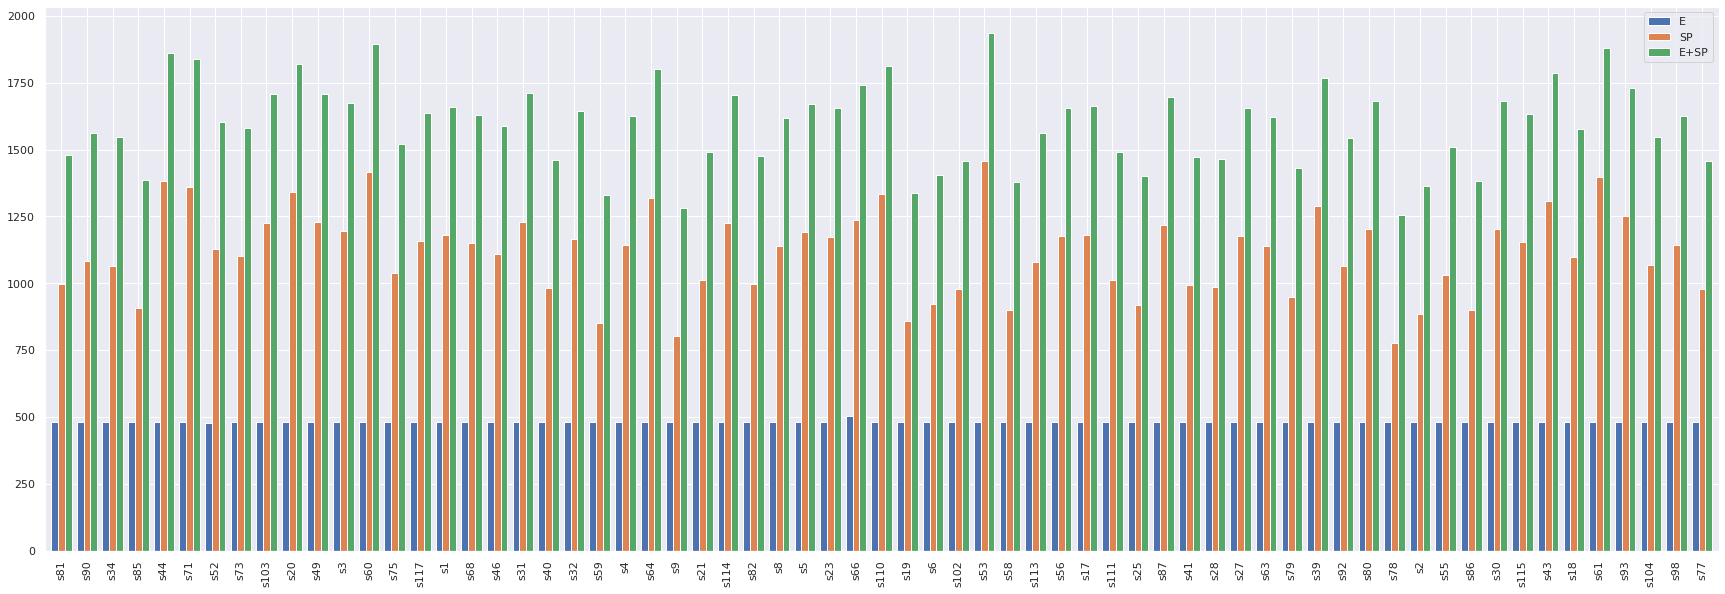

In [ ]:
df_shape.plot(kind="bar", figsize = (30,10), width=0.8)

In [225]:
## Create dfs

# ct3_mpii = consolidate_3(subjects, pred_path.MPII, save = True) 
# ct3_eth = consolidate_3(subjects, pred_path.ETH, save = True)
# ct3_faze = consolidate_3(subjects, pred_path.FAZE, save = True)

## Load dfs
ct3_mpii = pd.read_csv("calib_tests_df/mpii_ct3.csv")
ct3_eth = pd.read_csv("calib_tests_df/eth_ct3.csv")
ct3_faze = pd.read_csv("calib_tests_df/faze_ct3.csv")

# ct3_mpii = ct3_mpii[ct3_mpii["subject"].isin(subjects)].reset_index(drop=True)
# ct3_eth = ct3_eth[ct3_eth["subject"].isin(subjects)].reset_index(drop=True)
# ct3_faze = ct3_faze[ct3_faze["subject"].isin(subjects)].reset_index(drop=True)

In [226]:
ct3_comb = pd.merge(ct3_mpii,ct3_eth, on = ["subject", "factor"]).merge(ct3_faze, on = ["subject", "factor"])
ct3_comb = ct3_comb.set_index(["subject","factor"]).stack().reset_index()
ct3_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct3_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
ct3_comb
print(AnovaRM(data=ct3_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample              12.7457 2.0000 128.0000 0.0000
factor_model               50.6535 2.0000 128.0000 0.0000
factor_sample:factor_model  1.1236 4.0000 256.0000 0.3458



In [348]:
tmp= ct3_comb[ct3_comb["factor_sample"]=="E+SP"][ct3_comb["factor_model"]=="mpii"].set_index("subject")
tmp.join(df_shape)[["acc","E+SP"]].astype(float).corr()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,acc,E+SP
acc,1.000000,-0.582499
E+SP,-0.582499,1.000000


In [352]:
tmp= ct3_comb[ct3_comb["factor_sample"]=="E+SP"][ct3_comb["factor_model"]=="eth"].set_index("subject")
tmp.join(df_shape)[["acc","E+SP"]].astype(float).corr()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,acc,E+SP
acc,1.000000,-0.344727
E+SP,-0.344727,1.000000


In [222]:
#FAZE is sig better than other two
mpii = ct3_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct3_eth[["subject","acc"]].groupby("subject").mean()
faze = ct3_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  9.89701 |    64 | two-sided     | 1.58357e-14 | 4.75072e-14 | bonf       | 4.526e+11 |  1.07021  |
|  1 | model      | ETHXGaze | MPII | True     | True         |  1.66704 |    64 | two-sided     | 0.100393    | 0.301178    | bonf       | 0.503     |  0.196376 |
|  2 | model      | FAZE     | MPII | True     | True         | -9.26254 |    64 | two-sided     | 1.97364e-13 | 5.92092e-13 | bonf       | 3.952e+10 | -0.820267 |


In [230]:
avg_samples = ct3_mpii.append(ct3_eth).append(ct3_faze)
avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()
avg_samples["acc_deg"] = avg_samples["acc"]/54.05
print(avg_samples.groupby("factor").mean().sort_values("acc").reset_index().to_markdown(), end="\n\n")
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | factor   |     acc |   acc_deg |
|---:|:---------|--------:|----------:|
|  0 | E+SP     | 191.805 |   3.54866 |
|  1 | E        | 204.389 |   3.78148 |
|  2 | SP       | 204.687 |   3.78699 |

|    | Contrast   | A    | B    | Paired   | Parametric   |          T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |      hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|-----------:|------:|:--------------|------------:|------------:|:-----------|-----------:|------------:|
|  0 | factor     | E    | E+SP | True     | True         |  4.87487   |    64 | two-sided     | 7.51941e-06 | 2.25582e-05 | bonf       |   2337.97  |  0.165567   |
|  1 | factor     | E    | SP   | True     | True         | -0.0790185 |    64 | two-sided     | 0.937264    | 1           | bonf       |      0.136 | -0.00393515 |
|  2 | factor     | E+SP | SP   | True     | True         | -6.03281   |    64 | two-sided     | 8.90408e-08 | 2.67122e-07 | bonf       | 1

Text(0, 0.5, '')

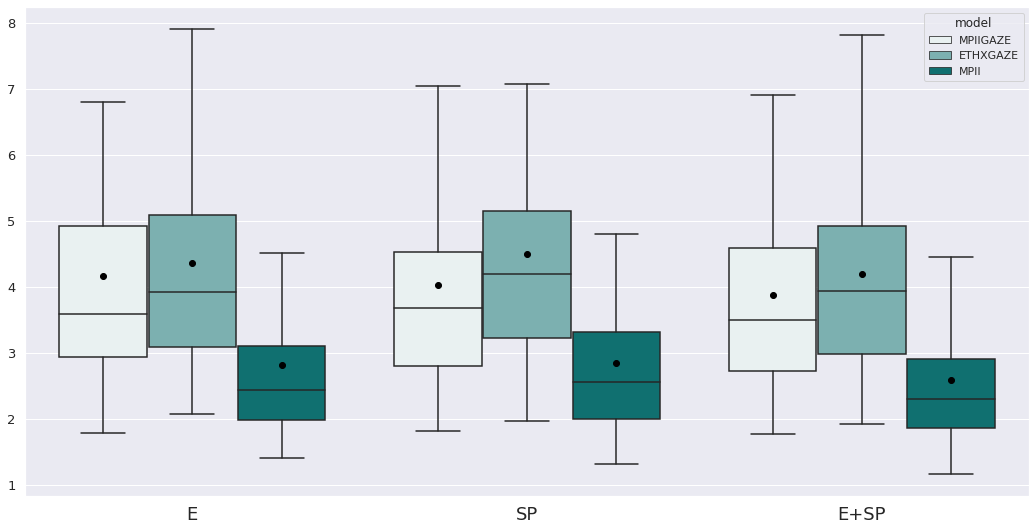

In [231]:
plt.figure(figsize=(18,9))
ct3_mpii = ct3_mpii[ct3_mpii["subject"].isin(subjects)].reset_index(drop=True)
ct3_eth = ct3_eth[ct3_eth["subject"].isin(subjects)].reset_index(drop=True)
ct3_faze = ct3_faze[ct3_faze["subject"].isin(subjects)].reset_index(drop=True)
temp = pd.concat([ct3_mpii, ct3_eth, ct3_faze], keys=["MPIIGAZE", "ETHXGAZE", "MPII"], names=["model"]).reset_index()
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="model", data = temp, color="teal", showfliers = False,  showmeans=True, meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.xticks(fontsize=18)
plt.yticks(fontsize = 13)
plt.xlabel('')
plt.ylabel('')
# plt.savefig("calib3_etra.svg")

In [238]:
def ct3_run_tests(ct3_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct3_df = ct3_df.copy()
    if in_vis_deg: 
        ct3_df["acc_deg"] = ct3_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
#     if exclude_low_fps:
#         ct3_df = ct3_df[~ct3_df.subject.isin(low_fps_subb)]
    
    print(ct3_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']))
    print(AnovaRM(data=ct3_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct3_df, color=pal[2], showfliers = False)
#     sns.swarmplot(x="factor", y=target, data = ct3_df[~ct3_df.subject.isin(low_fps_subb)], color = pal[0])
    if not exclude_low_fps: sns.swarmplot(x="factor", y=target, data = ct3_df, color = pal[1], marker = '<')
    plt.show()

        count        max      mean       min       std
factor                                                
E          65  11.208970  4.159439  1.778638  1.834301
E+SP       65  10.213215  3.870817  1.765512  1.673364
SP         65  10.097063  4.022204  1.810623  1.742706
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor  8.7938 2.0000 128.0000 0.0003



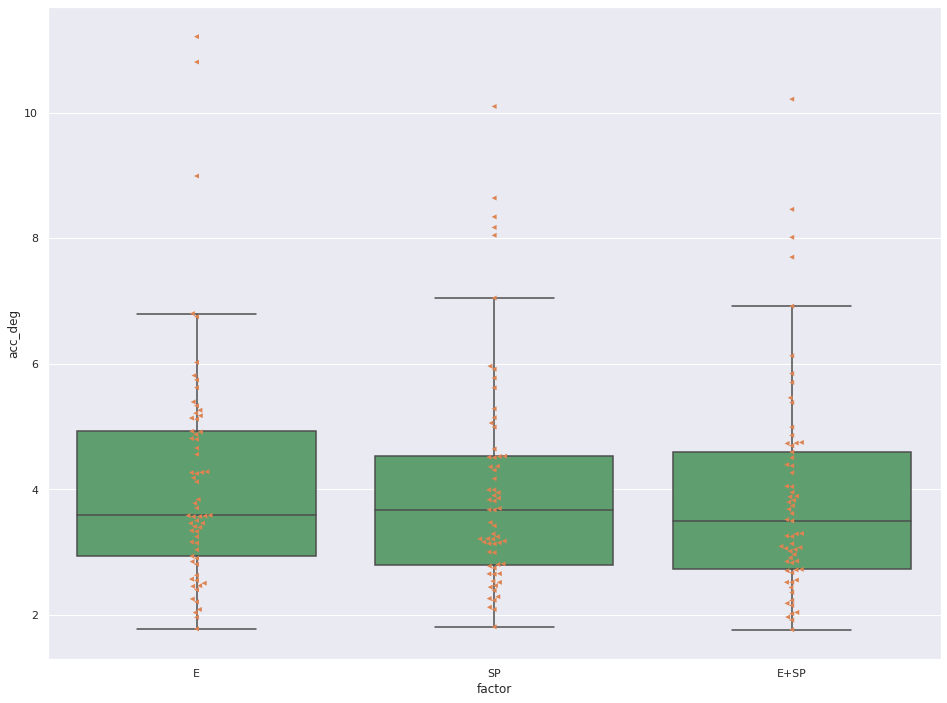

        count        max      mean       min       std
factor                                                
E          65  10.115671  4.363603  2.067101  1.742078
E+SP       65  10.325842  4.187981  1.918062  1.708406
SP         65  10.612211  4.494456  1.965526  1.747509
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor  2.9719 2.0000 128.0000 0.0548



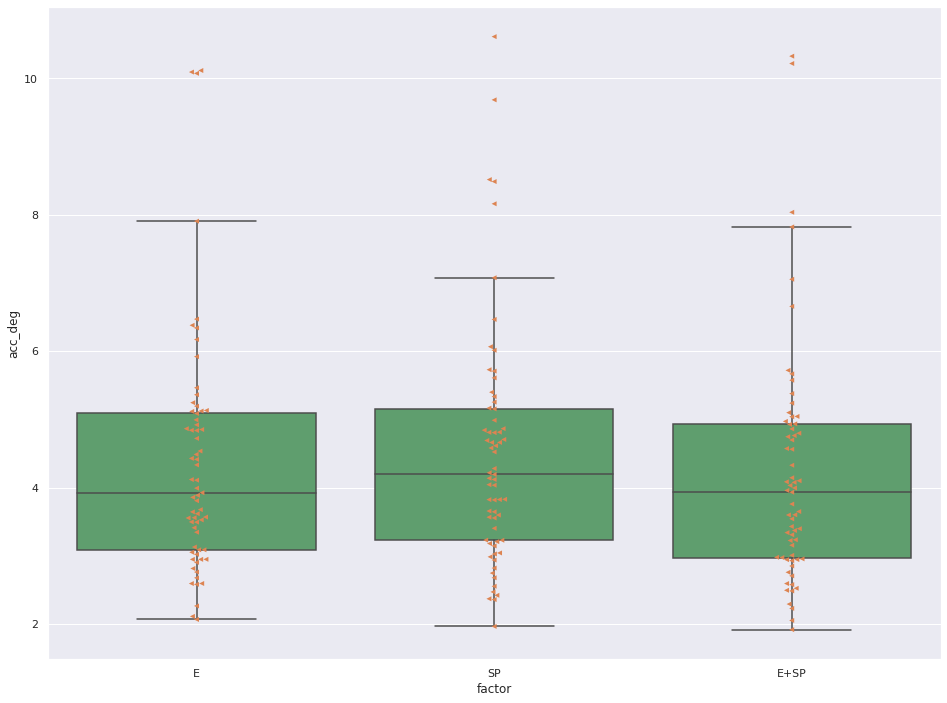

        count        max      mean       min       std
factor                                                
E          65  11.029067  2.821400  1.398690  1.389888
E+SP       65  10.727076  2.587190  1.159345  1.341436
SP         65  10.330374  2.844325  1.309193  1.342551
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor  9.0550 2.0000 128.0000 0.0002



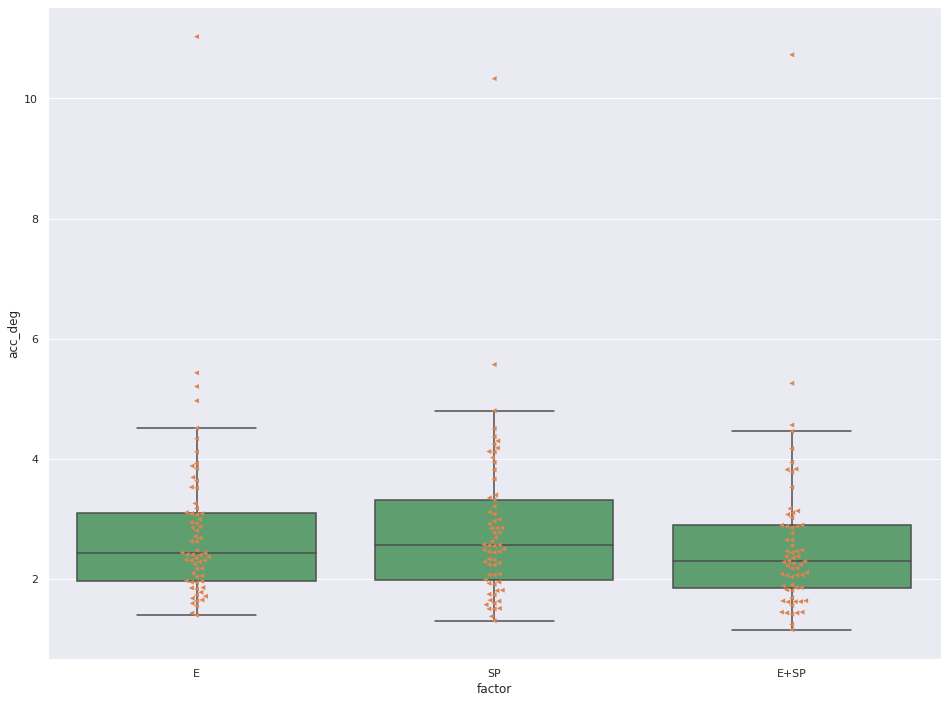

In [239]:
ct3_run_tests(ct3_mpii, in_vis_deg=True)
ct3_run_tests(ct3_eth, in_vis_deg=True)
ct3_run_tests(ct3_faze, in_vis_deg=True)

In [355]:
import pingouin as pg
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_mpii).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_eth).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_faze).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|--------:|-----------:|
|  0 | factor     | E    | E+SP | True     | True         |  4.23957 |    64 | two-sided     | 7.34268e-05 | 0.00022028  | bonf       | 282.264 |  0.163428  |
|  1 | factor     | E    | SP   | True     | True         |  1.53062 |    64 | two-sided     | 0.130791    | 0.392372    | bonf       |   0.411 |  0.0762563 |
|  2 | factor     | E+SP | SP   | True     | True         | -3.84865 |    64 | two-sided     | 0.000276705 | 0.000830116 | bonf       |  83.586 | -0.0880938 |
|    | Contrast   | A    | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |     p-corr | p-adjust   |   BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:---

In [155]:
from pingouin import rm_anova
rm_anova(data=ct3_comb, dv = 'acc', within = ['factor_sample', 'factor_model'], subject='subject', detailed = True, effsize = 'n2')

/home/shreshth.saxena/.conda/envs/temp/lib/python3.9/site-packages/pingouin/distribution.py:459: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,factor_sample,20148.510536,2,80,10074.255268,9.038316,0.000289,0.001468,0.002457,0.704121
1,factor_model,489322.302880,2,80,244661.151440,2.657205,0.076332,0.109795,0.059670,0.515620
2,factor_sample * factor_model,10603.451931,4,160,2650.862983,1.883230,0.115897,0.183943,0.001293,0.136061


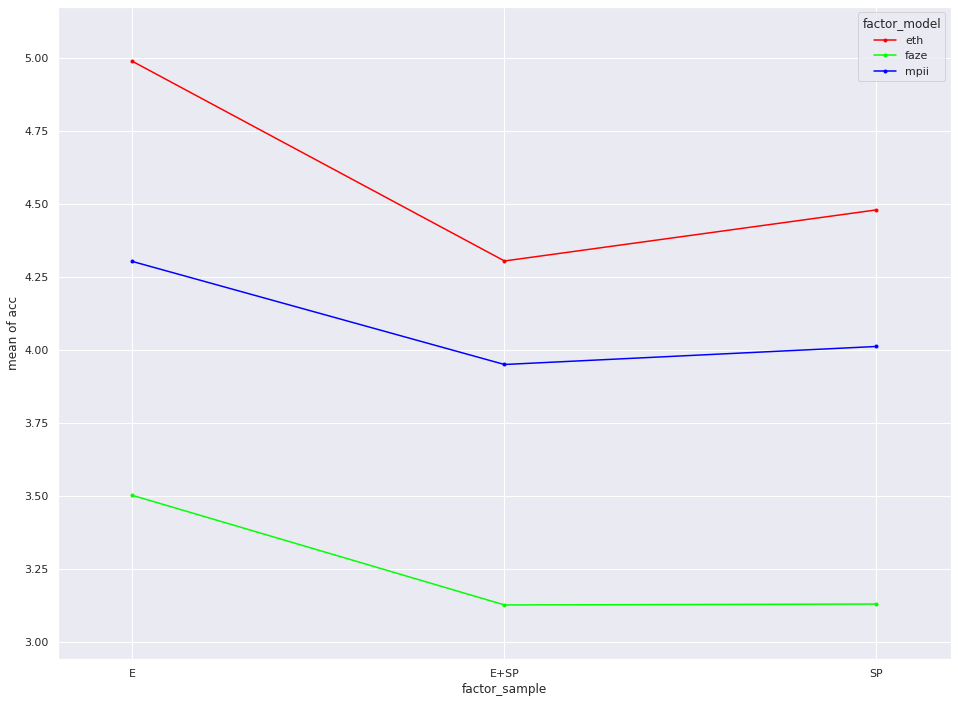

In [55]:
from statsmodels.graphics.factorplots import interaction_plot
# ct1_comb["acc_v"] = ct1_comb['acc']/54.05
interaction_plot(ct3_comb["factor_sample"], ct3_comb["factor_model"], ct3_comb["acc"]/54.05)
plt.show()

### ruf

158.83202961595322


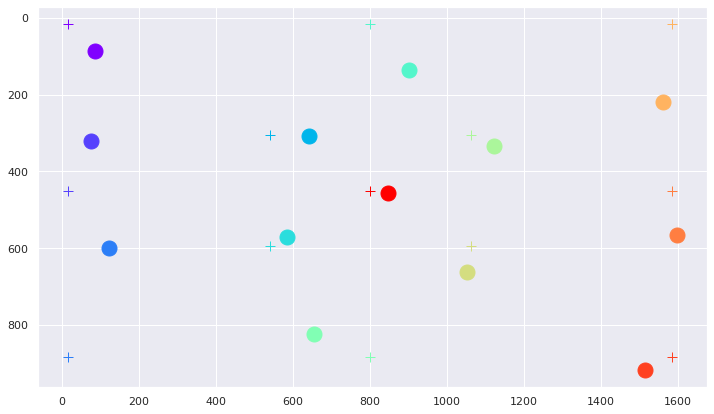

In [358]:
pallete = iter(cm.rainbow(np.linspace(0, 1, 13)))
plt.figure(figsize=(12,7))
fix_analyse = Fixation('s55', show = False)
trial_x, trial_y = fix_analyse.parse_trials(pred_path.FAZE,1, "poly_x_3", "poly_y_3", show = False)
print(get_fix_acc(fix_analyse.gt_points, trial_x, trial_y))
for key in range(1,14):
    c = next(pallete)
    pt = fix_analyse.gt_points[key-1]
    plt.plot(pt[0],pt[1], marker="+", markersize=10, color = c)
    
    X = winsorize(trial_x[key], limits=[0.1,0.1]).mean()
    Y = winsorize(trial_y[key], limits=[0.1,0.1]).mean()
    
#     X = statistics.median(trial_x[key])
#     Y = statistics.median(trial_y[key])
    plt.plot(X,Y, color = c, markersize = 15, marker = "o")
plt.gca().invert_yaxis()
plt.show()

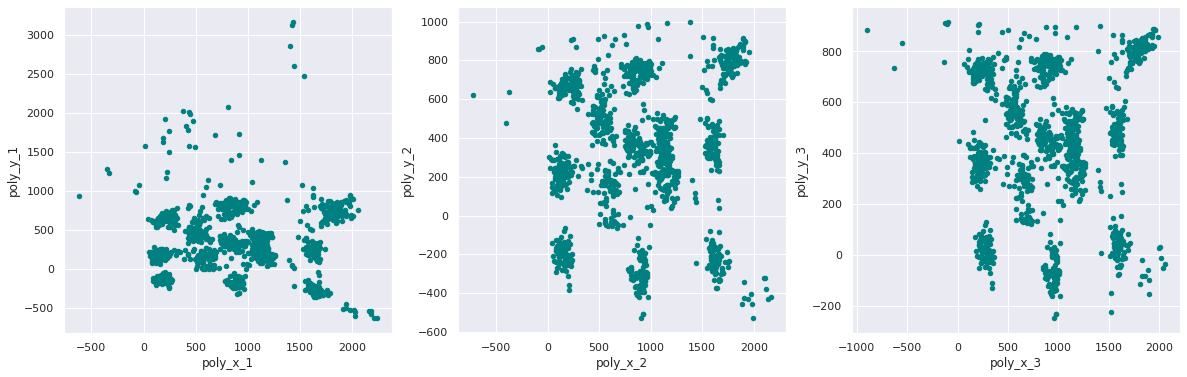

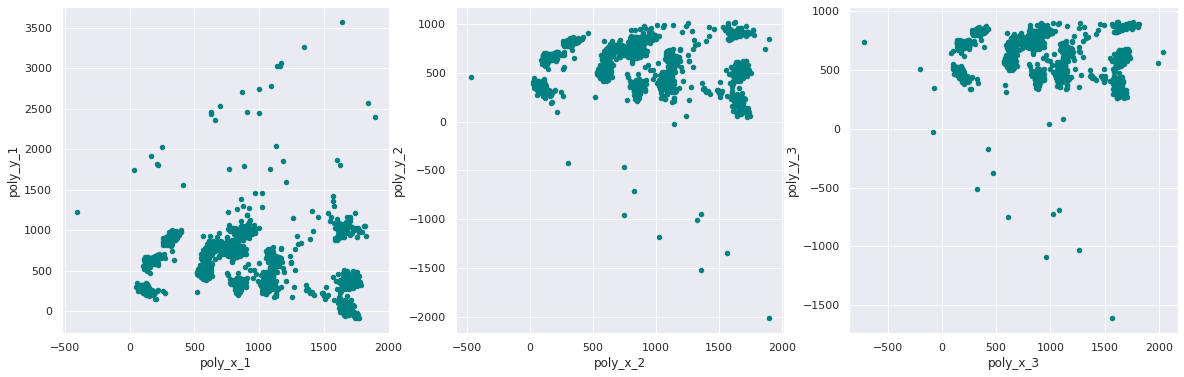

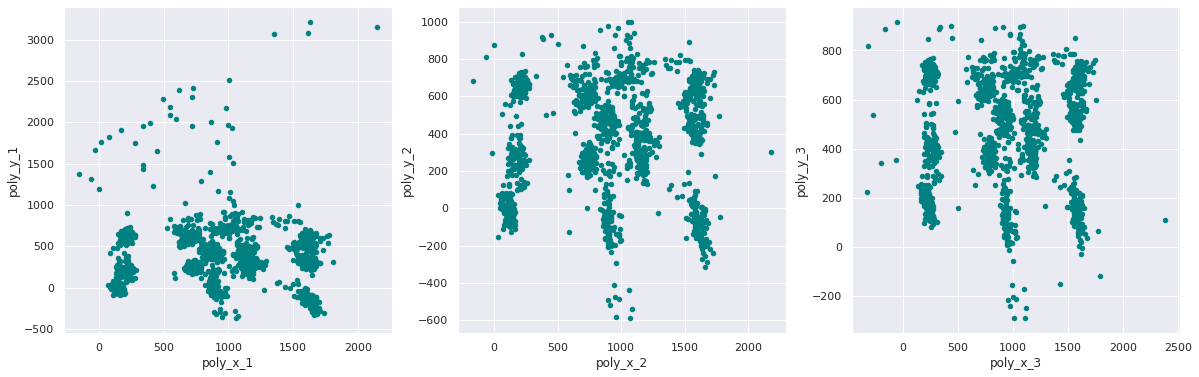

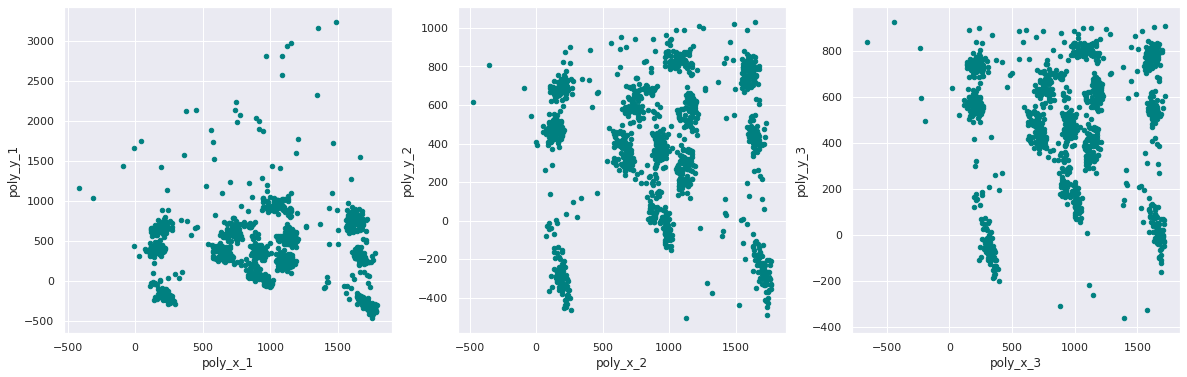

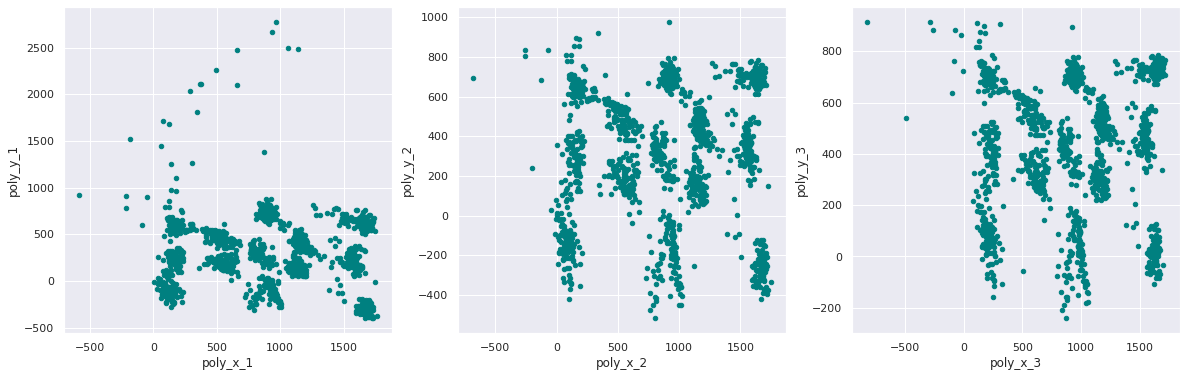

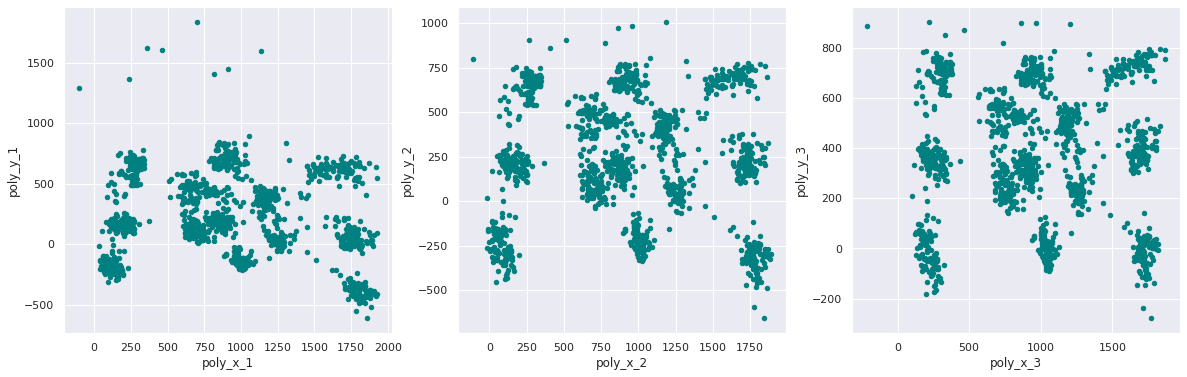

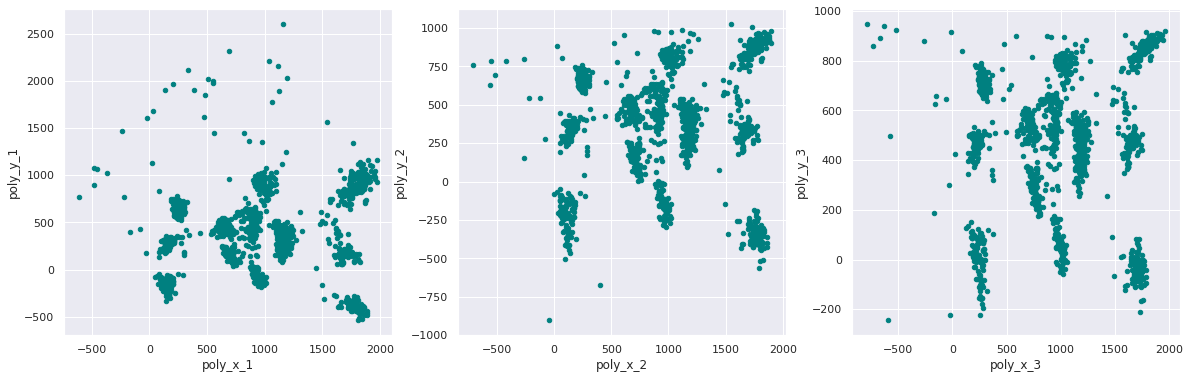

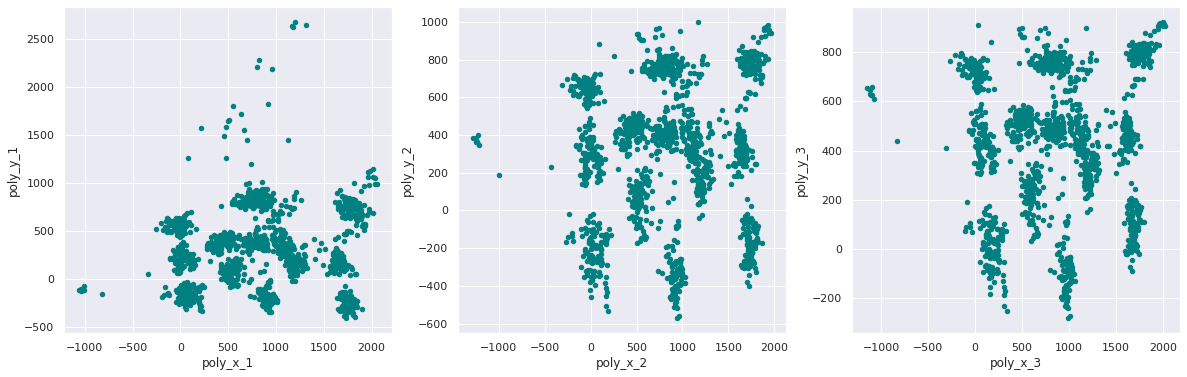

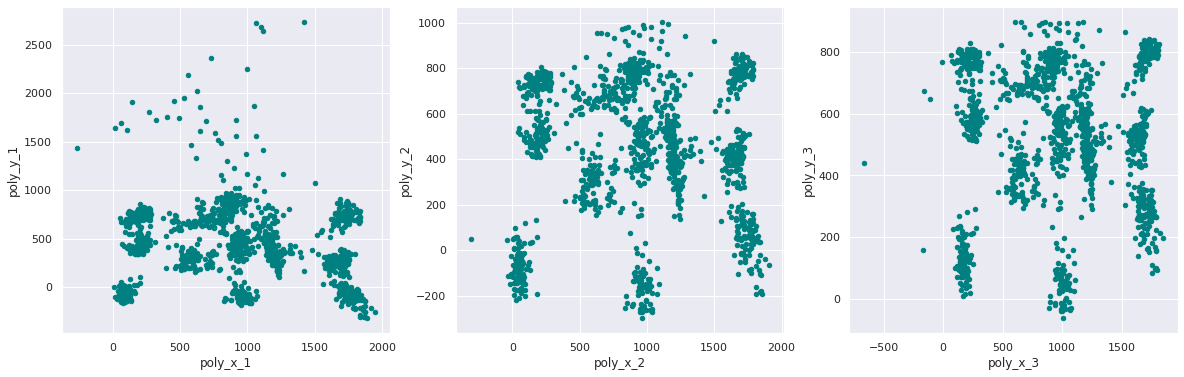

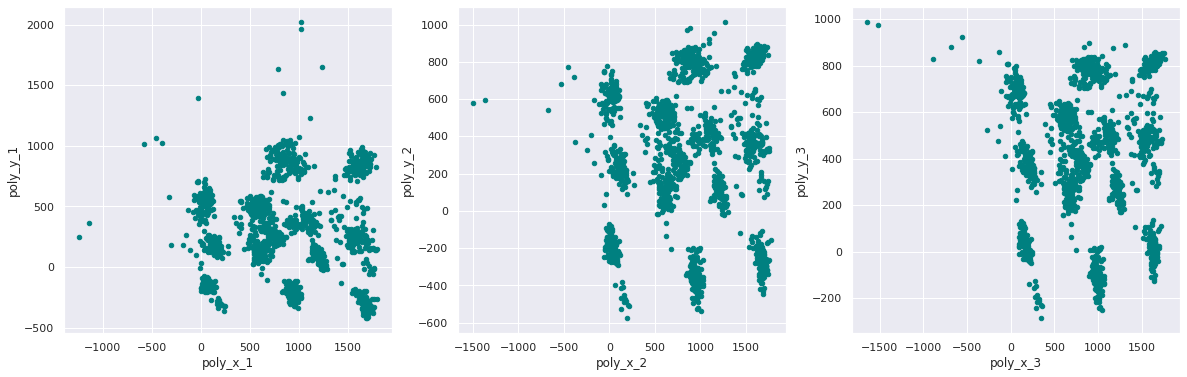

In [345]:
subb = "s17"

for path in glob.glob(pred_path.ETH.value+f'{subb}/calib_test1/outputs/*/*'):
        fig, axs = plt.subplots(1,3, figsize=(20,6))
        df = pd.read_csv(path)
        df.plot(x="poly_x_1", y = "poly_y_1", kind = "scatter", ax=axs[0], color ='teal')
        df.plot(x="poly_x_2", y = "poly_y_2", kind = "scatter", ax=axs[1], color='teal')
        df.plot(x="poly_x_3", y = "poly_y_3", kind = "scatter", ax=axs[2], color='teal')